In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import xgboost as xgb

from sklearn.model_selection import train_test_split
import xgboost
import shap
import numpy as np
import matplotlib.pylab as pl

from xgboost import plot_importance
from matplotlib import pyplot

In [25]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

os_data_X,os_data_y=os.fit_sample(X, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=X.columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['class'])

In [43]:
y_col = df_train["class"] 
df = df_train.drop("class",axis=1)
type(y_col)
df_train =y_col.cbind(df)
df_train.columns[0] = "y"

In [46]:
df_train = df_train.rename(columns={"class":"y"})

################################ XGBOOST MODEL #####################################m

In [4]:
import xgboost as xgb
import pandas as pd
dtrain = pd.read_csv('train_v01pk.csv')
#dtest = pd.read_csv('bankruptcy_Test_X.csv')
dtrain = dtrain.drop(['id'],axis=1)
dtrain = dtrain.drop(['Unnamed: 0'],axis=1)
y_col = dtrain["y"] 
df = dtrain.drop("y",axis=1)
dtrain = pd.concat([y_col,df],axis=1)
#id_col = dtest["ID"]

#dtest = dtest.drop("ID",axis=1)


In [5]:
dtrain = xgb.DMatrix(df, label=dtrain["y"])
#dtest = xgb.DMatrix(dtest)

C:\Users\rarun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\rarun\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [6]:

param = {
    'max_depth': 100,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'binary:logistic',  # error evaluation for multiclass training
    'eval_metric': 'auc'
    
}  # the number of classes that exist in this datset
num_round = 100  # the number of training iterations

bst = xgb.train(param, dtrain, num_round)

In [7]:
cross_v = xgb.cv(param, dtrain, num_boost_round = num_round ,nfold=5, stratified = True, metrics='auc', seed=50,early_stopping_rounds = 100,)
#best_score = max(cross_v['test-auc-mean'])

In [2]:
shap.initjs()

# IMPORTANCE PLOT OF VARIABLES

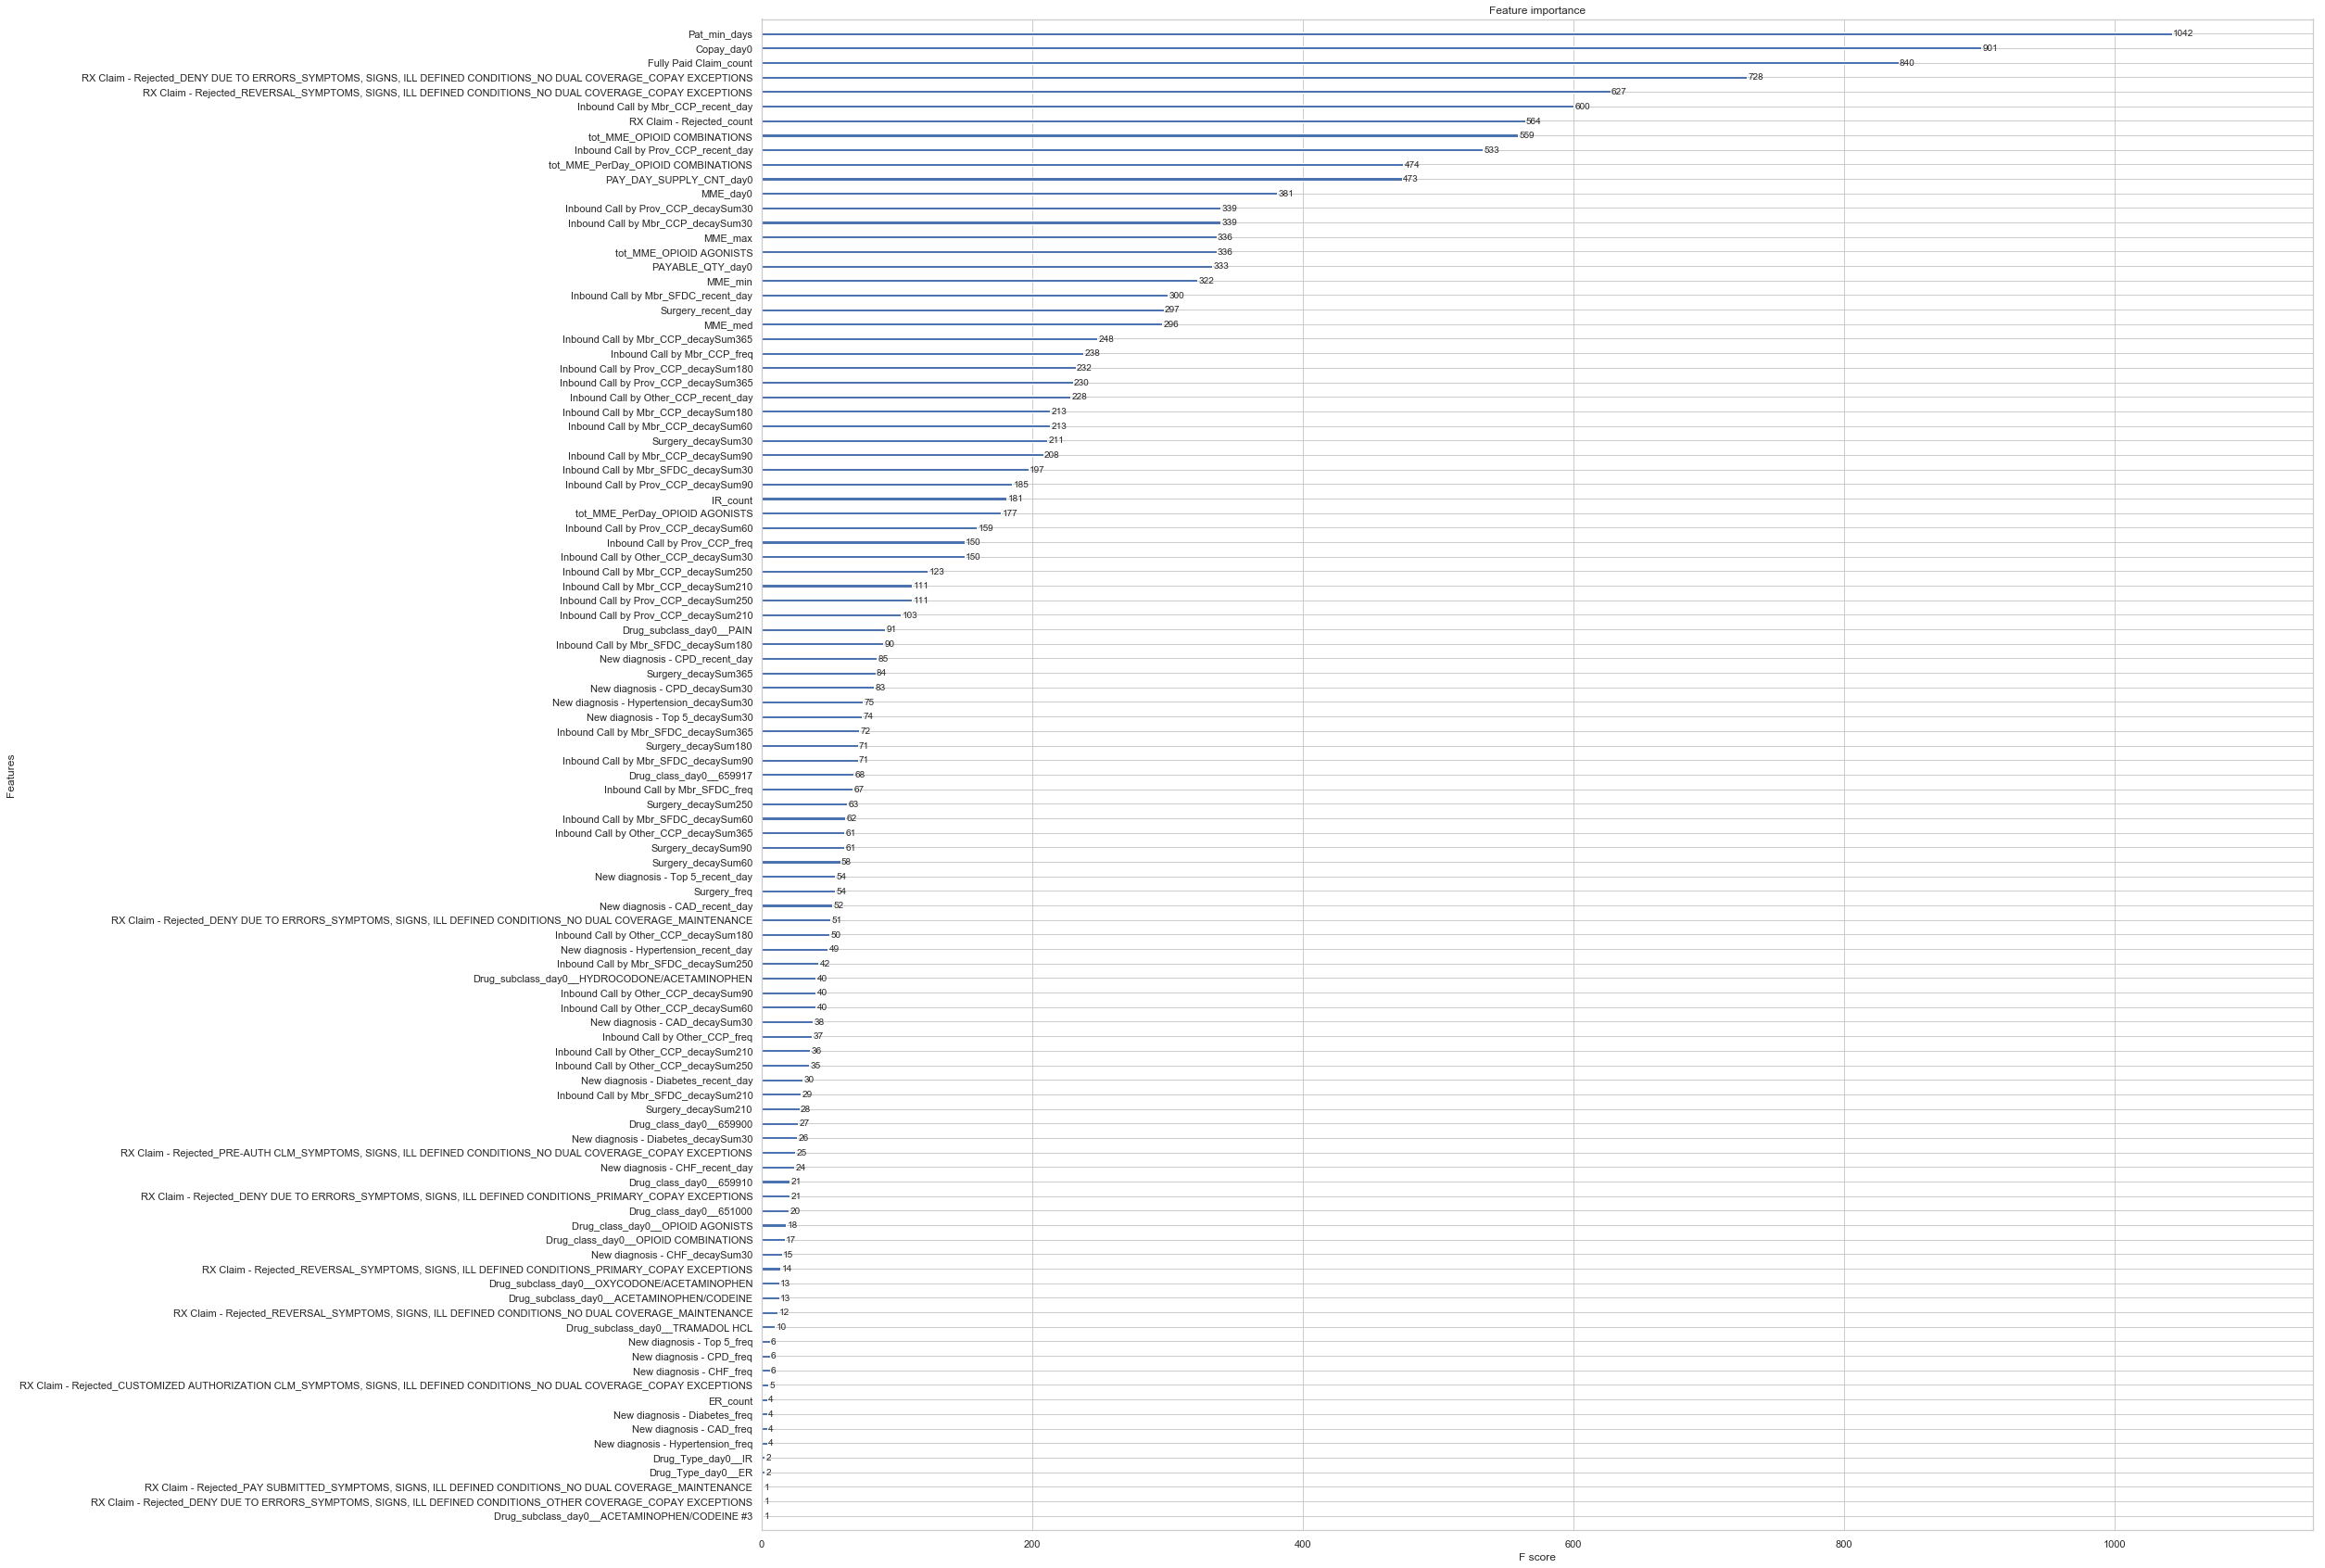

In [12]:

ax = xgb.plot_importance(bst)
fig = ax.figure
fig.set_size_inches(30, 30)
fig.savefig('lauda.pdf')

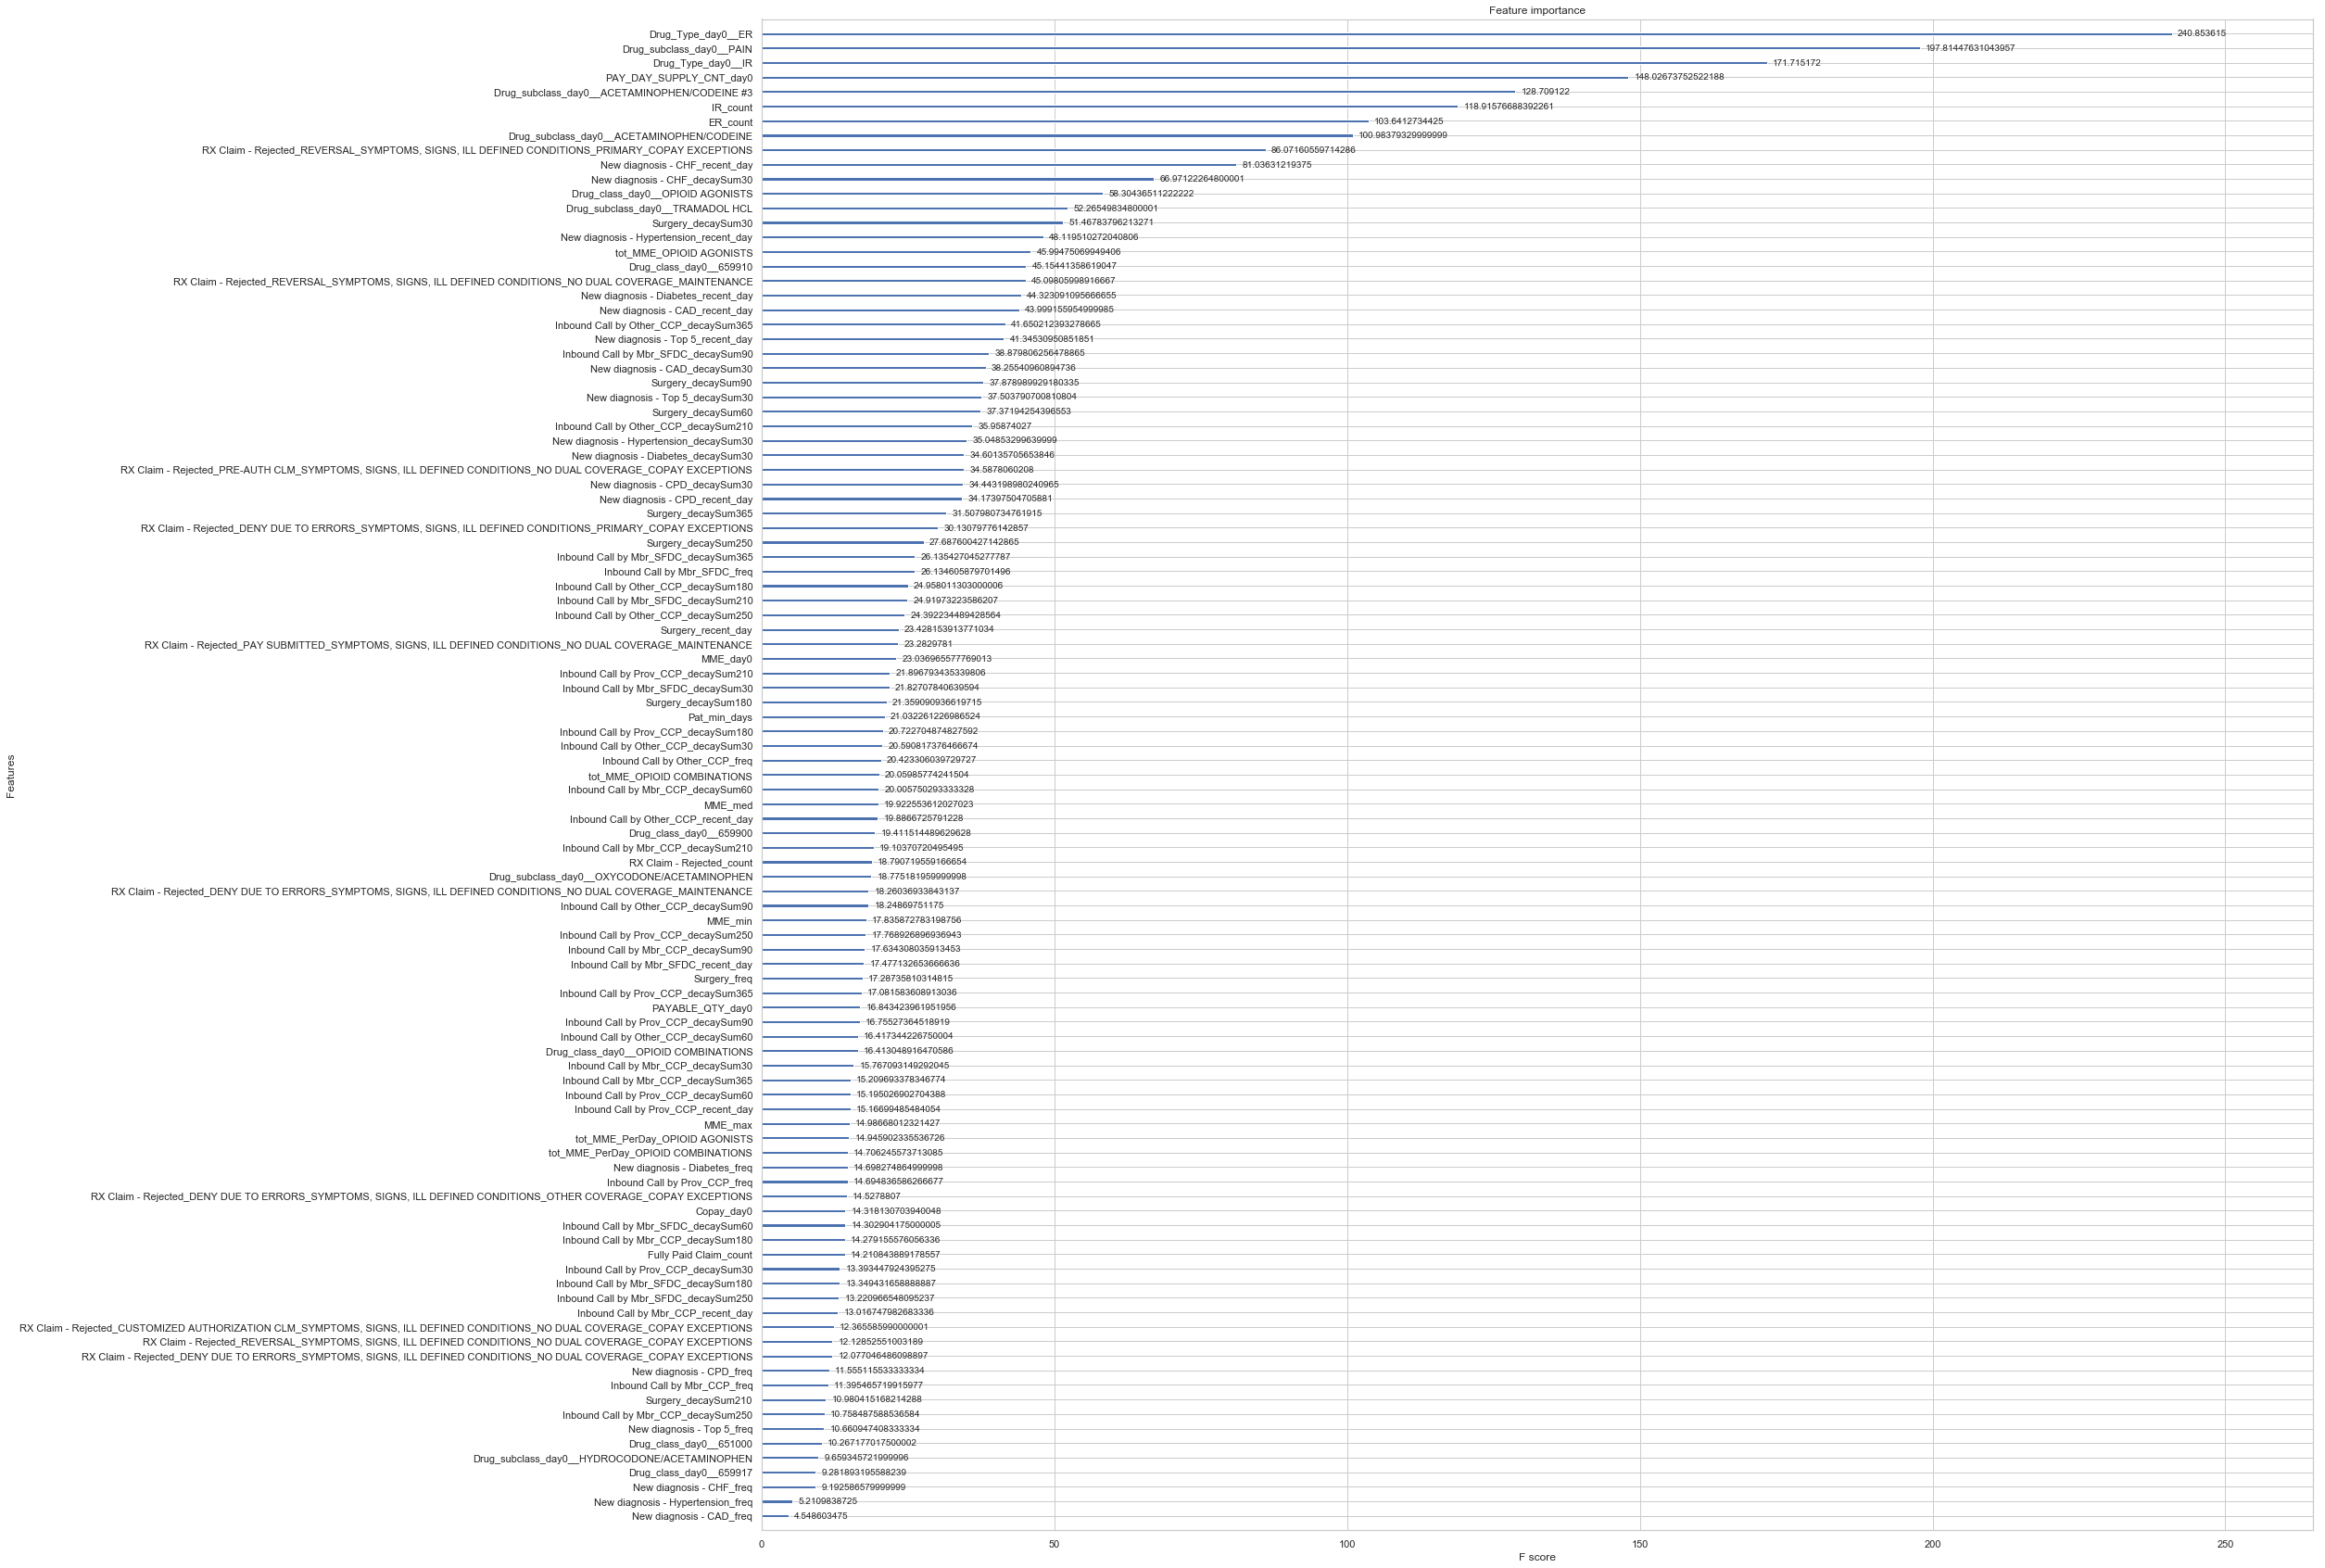

In [14]:
# PLOT IMPORTANCE BASED ON 

ax2 = xgb.plot_importance(bst, importance_type="cover")
#pl.title('xgb.plot_importance(bst, importance_type="cover")')
fig2 = ax2.figure
fig2.set_size_inches(30, 30)
#fig2.savefig('lauda.pdf')

# STARTING TO USE SHAP

In [15]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(df)

In [25]:
shap.force_plot(explainer.expected_value, shap_values[0,:], df.iloc[0,:])

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_display.iloc[:1000,:])

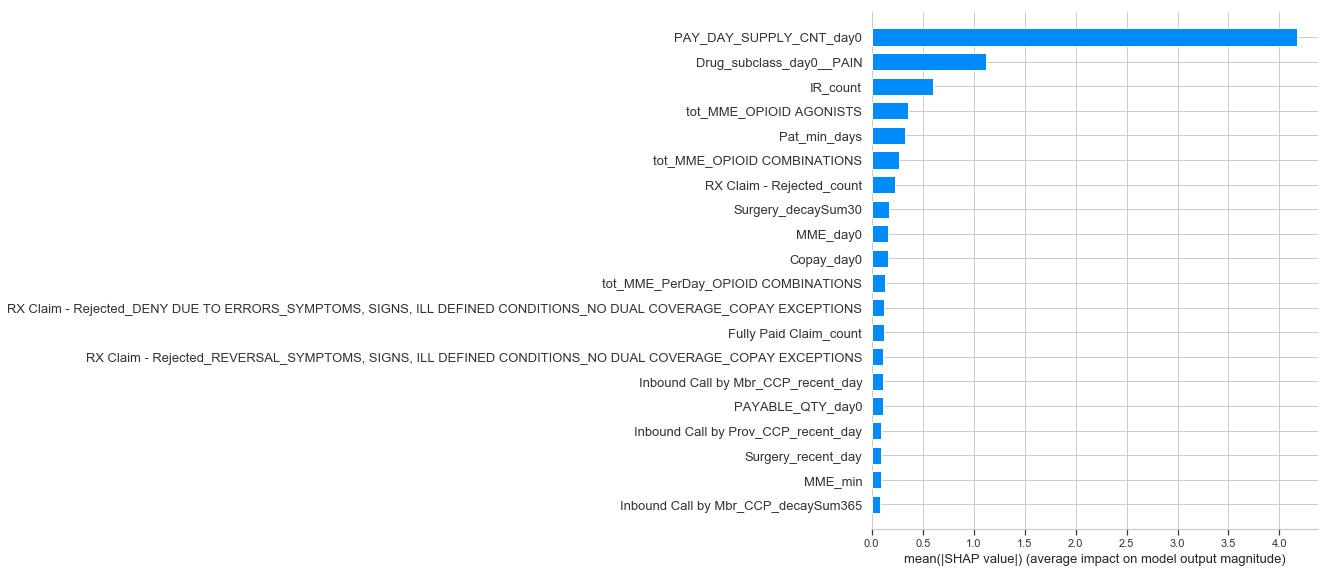

In [23]:
shap.summary_plot(shap_values, df, plot_type="bar")

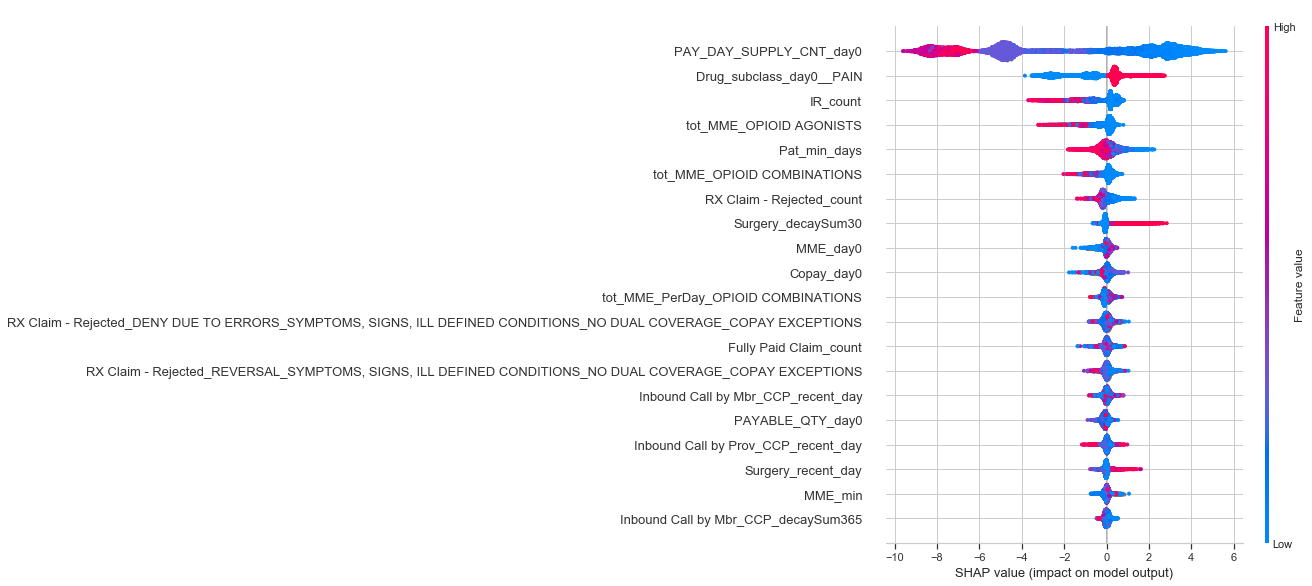

In [24]:
shap.summary_plot(shap_values, df)

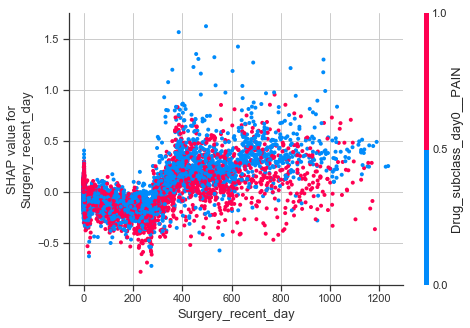

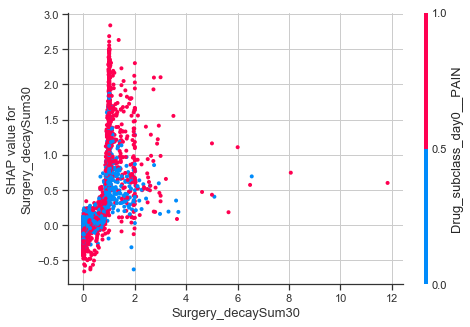

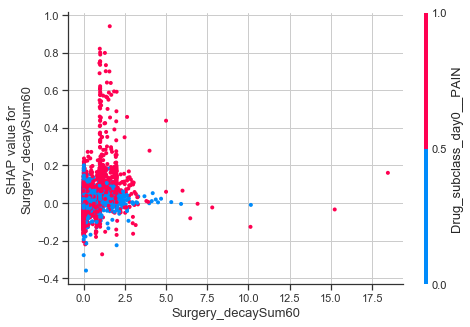

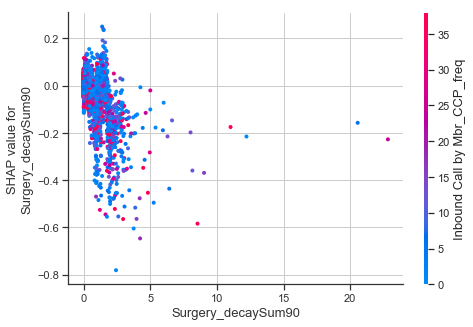

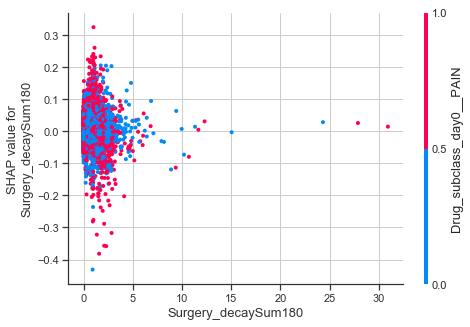

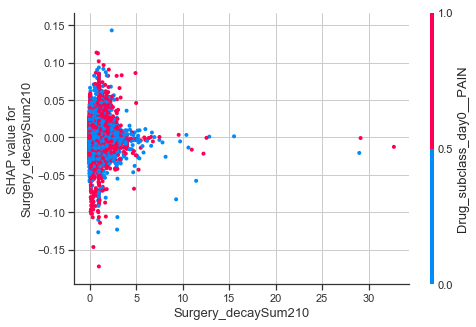

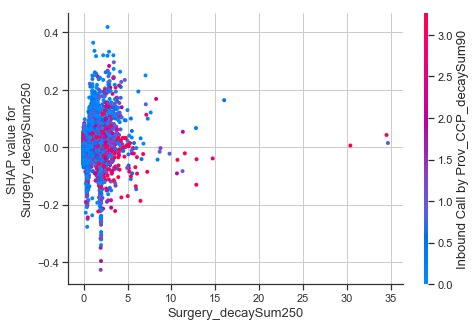

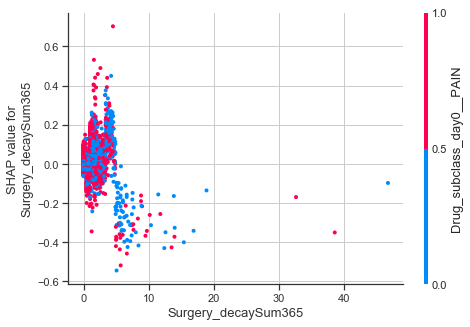

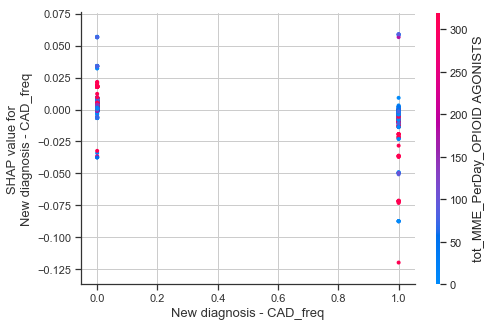

In [28]:
for name in df.columns[1:10]:
    shap.dependence_plot(name, shap_values, df, display_features=df)

In [29]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

shap_pca50 = PCA(n_components=12).fit_transform(shap_values[:1000,:])
shap_embedded = TSNE(n_components=2, perplexity=50).fit_transform(shap_values[:1000,:])

In [30]:
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
cdict1 = {
    'red': ((0.0, 0.11764705882352941, 0.11764705882352941),
            (1.0, 0.9607843137254902, 0.9607843137254902)),

    'green': ((0.0, 0.5333333333333333, 0.5333333333333333),
              (1.0, 0.15294117647058825, 0.15294117647058825)),

    'blue': ((0.0, 0.8980392156862745, 0.8980392156862745),
             (1.0, 0.3411764705882353, 0.3411764705882353)),

    'alpha': ((0.0, 1, 1),
              (0.5, 1, 1),
              (1.0, 1, 1))
}  # #1E88E5 -> #ff0052
red_blue_solid = LinearSegmentedColormap('RedBlue', cdict1)

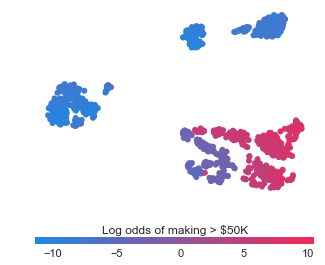

In [31]:
f = pl.figure(figsize=(5,5))
pl.scatter(shap_embedded[:,0],
           shap_embedded[:,1],
           c=shap_values[:1000,:].sum(1).astype(np.float64),
           linewidth=0, alpha=1., cmap=red_blue_solid)
cb = pl.colorbar(label="Log odds of making > $50K", aspect=40, orientation="horizontal")
cb.set_alpha(1)
cb.draw_all()
cb.outline.set_linewidth(0)
cb.ax.tick_params('x', length=0)
cb.ax.xaxis.set_label_position('top')
pl.gca().axis("off")
pl.show()

In [52]:
#plot_importance(bst)
#feature_imp = pd.Series(bst.feature_importances_,index=X_train.columns).sort_values(ascending=False).head(20)
#pyplot.savefig('lauda.pdf')
cross_v.get_score(importance_type='gain')

AttributeError: 'DataFrame' object has no attribute 'get_score'

In [27]:
cross_v['train-auc']

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.984997,0.000664,0.921828,0.005682
1,0.993218,0.000282,0.925923,0.005473
2,0.996464,0.000240,0.929156,0.006446
3,0.998151,0.000171,0.930323,0.006237
4,0.999004,0.000154,0.931506,0.006239
5,0.999461,0.000099,0.932260,0.005756
6,0.999671,0.000097,0.932663,0.005423
7,0.999782,0.000088,0.933282,0.005199
8,0.999822,0.000084,0.933766,0.005238
9,0.999935,0.000031,0.934445,0.004894


In [364]:
preds = bst.predict(dtest)

In [595]:
df_out = pd.DataFrame({'ID':list(id_col), 'class':list(preds[:,1])})

df_out.to_csv("output.csv",index=False)


IndexError: too many indices for array

In [366]:
len(df_out[df_out["class"]>0.5])

29

################   CROSS VALIDATION #################################

In [7]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,4 mins 37 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.5
H2O cluster version age:,13 days
H2O cluster name:,H2O_from_python_rarun_bt1fq9
H2O cluster total nodes:,1
H2O cluster free memory:,3.231 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [5]:
train_path = 'bankruptcy_Train.csv'
test_path = 'bankruptcy_Test_X.csv'

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [6]:

#df_train=df_train.cbind(df_train['class'].stratified_split(test_frac=0, seed=9))
train=df_train#[df_train['test_train_split']=='train']
val=df_train#[df_train['test_train_split']=='test']

In [8]:
#train = train.as_data_frame(use_pandas=True)
#val = val.as_data_frame(use_pandas=True)

AttributeError: 'DataFrame' object has no attribute 'as_data_frame'

In [9]:
# PREPARING DATA FOR MODELLING
val_y= val["class"]
df = val.drop("class",axis=1)
#df = df.drop("test_train_split", axis=1)
val = df

id_col = df_test["ID"]
test = df_test.drop("ID",axis=1)

y_col = train["class"]
df = train.drop("class",axis=1)
#df = df.drop("test_train_split", axis=1)
train = pd.concat([y_col,df],axis=1)
train = train.rename(columns={"class":"y"})


In [10]:
dtrain = xgb.DMatrix(df, label=train["y"])
dval = xgb.DMatrix(val)
dtest = xgb.DMatrix(test)

C:\Users\rarun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\rarun\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [50]:
# param = {
#     'max_depth': 4,  # the maximum depth of each tree
#     'eta': 0.3,  # the training step for each iteration
#     'silent': 1,  # logging mode - quiet
#     'objective': 'binary:logistic',  # error evaluation for multiclass training
#     'eval_metric': 'auc',
#     'colsample_bytree': 0.9712027123525692,
#     'learning_rate': 0.0709513949182238,
#     'subsample': 0.8951169798703923
# }  # the number of classes that exist in this datset

#param = {'colsample_bytree': 0.9447421122004811, 'eta': 0.3, 'eval_metric': 'auc', 'gamma': 0.01, 'learning_rate': 0.19976776235255564, 'max_depth': 67, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.9451727813177039} 
#param = {'min_child_weight':0.5,'gamma':0, 'colsample_bytree': 0.9487331285488207, 'eta': 0.3, 'eval_metric': 'auc', 'learning_rate': 0.19976776235255564, 'max_depth': 67, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.9352884567852784}
#5.7% #param = {'colsample_bylevel': 0.9350650042434023, 'colsample_bynode': 0.9768606589552319, 'colsample_bytree': 0.9631092450519108, 'eval_metric': 'auc', 'gamma': 0, 'learning_rate': 0.17494366958147353, 'max_delta_step': 3, 'max_depth': 62, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.9415469506102747}

param = {'colsample_bylevel': 0.9350650042434023, 'colsample_bynode': 0.9768606589552319, 'colsample_bytree': 0.9631092450519108, 'eval_metric': 'auc', 'gamma': 0, 'learning_rate': 0.17494366958147353, 'max_delta_step': 3, 'max_depth': 62, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.9415469506102747}

num_round = 200  # the number of training iterations


bst = xgb.train(param, dtrain, num_round)

In [128]:

import random
from hyperopt import hp



# space = {
#     'eta': 0.3,
#     'silent': 1,
#     'max_depth': hp.choice('max_depth', np.arange(1, 130, dtype=int)),
#     'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
#     'objective': 'binary:logistic',
#     'eval_metric': 'auc',
#     'colsample_bytree': hp.uniform('colsample_by_tree', 0.8, 1.0),
#     'subsample': hp.uniform('subsample', 0.8, 1.0)
# }
param = {'alpha':0.1,'lambda':1.1,'colsample_bylevel': 0.9350650042434023, 'colsample_bynode': 0.9768606589552319, 'colsample_bytree': 0.9631092450519108, 'eval_metric': 'auc', 'gamma': 0.01, 'learning_rate': 0.17494366958147353, 'max_delta_step': 3, 'max_depth': 62, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.9415469506102747}

space = {'gamma':hp.uniform('gamma', 0, 0.001),
         'alpha':hp.uniform('alpha', 0, 0.01),
         'lambda':hp.uniform('lambda', 0.9, 1.1),
         'colsample_bytree': hp.uniform('colsample_by_tree', 0.9181092450519108, 0.9881092450519108),#0.9487331285488207,
         'eval_metric': 'auc',
         'learning_rate':hp.loguniform('learning_rate', np.log(0.17304366958147353), np.log(0.37654366958147353)),#0.19976776235255564,
         'max_depth': hp.choice('max_depth', np.arange(50, 70, dtype=int)),#67,
         'objective': 'binary:logistic',
         'silent': 1,
         'lambda':1.1,
         'alpha':0.01,
         'subsample': hp.uniform('subsample', 0.9015469506102747, 0.985469506102747),#0.9352884567852784
         'max_delta_step':hp.choice('max_delta_step', np.arange(1, 6, dtype=int)),
         'colsample_bylevel':hp.uniform('colsample_bylevel', 0.9000650042434023, 0.9650650042434023),
         'colsample_bynode': hp.uniform('colsample_bynode', 0.9268606589552319, 0.9868606589552319)
        }


num_round=100                                          
                                          
#     'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 300000, 20000),
#     'min_child_samples': hp.quniform('min_child_samples', 20, 500, 5),
#     'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
#     'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),

#     'num_leaves': hp.quniform('num_leaves', 30, 150, 1),
                                                 

In [130]:
from hyperopt import tpe
from hyperopt import Trials
from hyperopt import STATUS_OK
import csv
from hyperopt import fmin


def loss_objective(params, n_fold=5):
    """Returns validation score from hyperparameters"""
    cross_v = xgb.cv(params, dtrain, num_boost_round = num_round ,nfold=5, stratified = True, metrics='auc', seed=50,early_stopping_rounds = 1000)
    best_score = max(cross_v['test-auc-mean'])
    #print(params)
    loss = 1-best_score    
    of_connection = open(out_file, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, params])
    of_connection.close()
#     if (loss<best_los):
#         best_los = loss
#         duration = 1000  # milliseconds
#         freq = 440  # Hz
#         winsound.Beep(freq, duration)
        
    return {'loss':loss,'params':params,'status': STATUS_OK}
 


# Algorithm
tpe_algorithm = tpe.suggest


# Trials object to track progress
bayes_trials = Trials()

best = fmin(fn = loss_objective, space = space, algo = tpe.suggest, 
            max_evals = 1000, trials = bayes_trials)


100%|███████████████████████████████████████████| 1000/1000 [3:53:57<00:00, 15.00s/it, best loss: 0.058187200000000106]


In [131]:
rest = fmin(fn = loss_objective, space = space, algo = tpe.suggest, 
            max_evals = 1000, trials = bayes_trials)

0it [00:00, ?it/s, best loss: ?]


In [18]:
out_file='xgb_trials3.csv' 

import csv
out_file = 'xgb_trials3.csv'
of_connection = open(out_file, 'w')
writer = csv.writer(of_connection)

# Write the headers to the file
writer.writerow(['loss', 'params'])
of_connection.close()

0.9259176

In [633]:
#VALIDATION
preds = bst.predict(dval)

pred_val=[]
for i in preds:
    if i>0.5:
        pred_val.append(1)
    else:
        pred_val.append(0)        

array([3.8100927e-05, 1.3630798e-04, 1.6329146e-04, ..., 1.2885794e-03,
       1.3790702e-04, 6.7059176e-05], dtype=float32)

In [13]:
#TRAIN
preds = bst.predict(dtrain)

pred_train=[]
for i in preds:
    if i>0.5:
        pred_train.append(1)
    else:
        pred_train.append(0)   


In [14]:
# TRAINING ERROR
from sklearn.metrics import confusion_matrix

confusion_matrix_t = confusion_matrix(y_col, pred_train)
tn, fp, fn, tp = confusion_matrix(y_col, pred_train).ravel()
print(confusion_matrix_t)
print("\n")
print(100*tp/(tp+fn))

[[9785    0]
 [   0  215]]


100.0


In [634]:
# VALIDATION ERROR
from sklearn.metrics import confusion_matrix

confusion_matrix_v = confusion_matrix(val_y, pred_val)
tn, fp, fn, tp = confusion_matrix(val_y, pred_val).ravel()
print(confusion_matrix_v)
print("\n")
print(100*tp/(tp+fn))

[[1 0]
 [0 1]]


100.0


In [12]:
#SAVING RESULTS

preds_test = bst.predict(dtest)
df_out = pd.DataFrame({'ID':list(id_col), 'class':list(preds_test)})
df_out.to_csv("output.csv",index=False)
